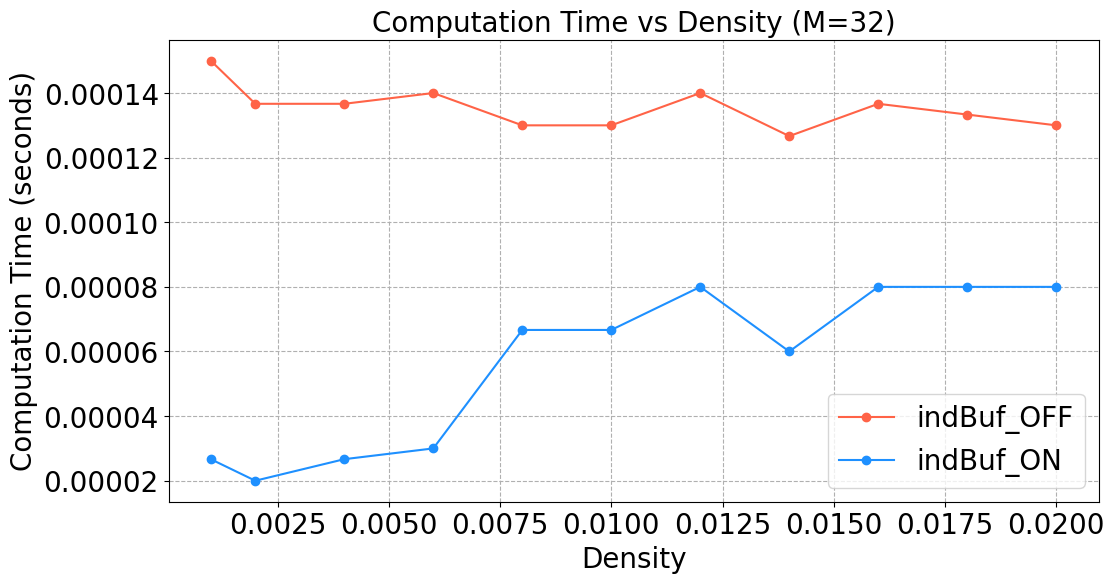

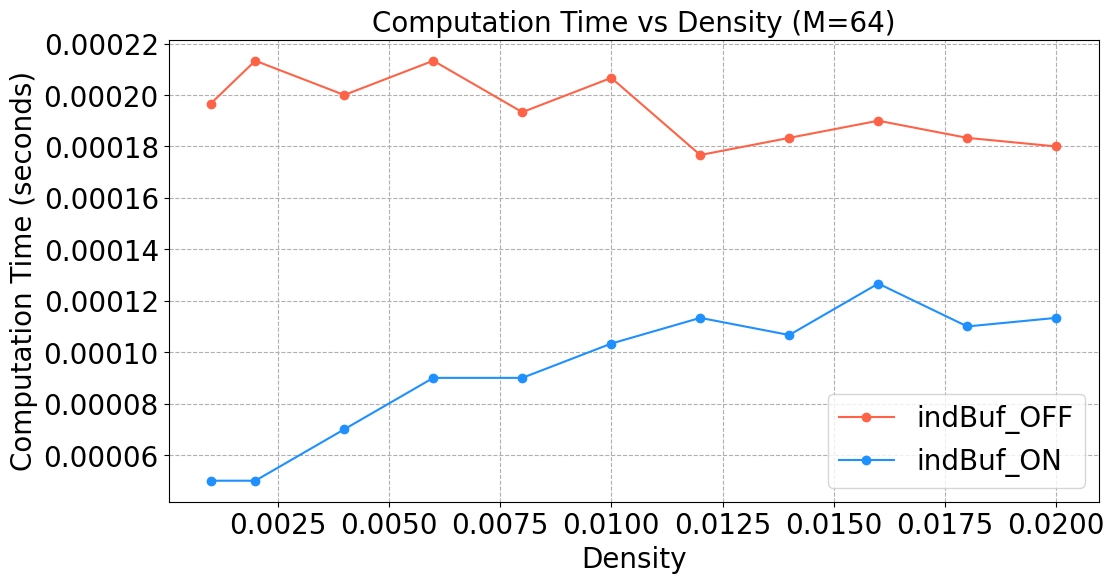

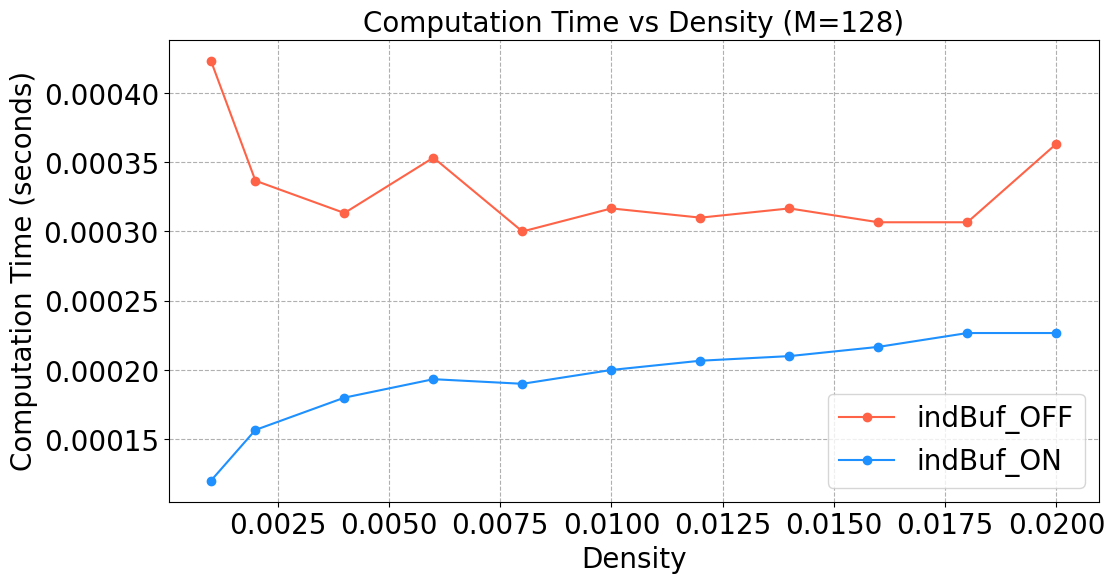

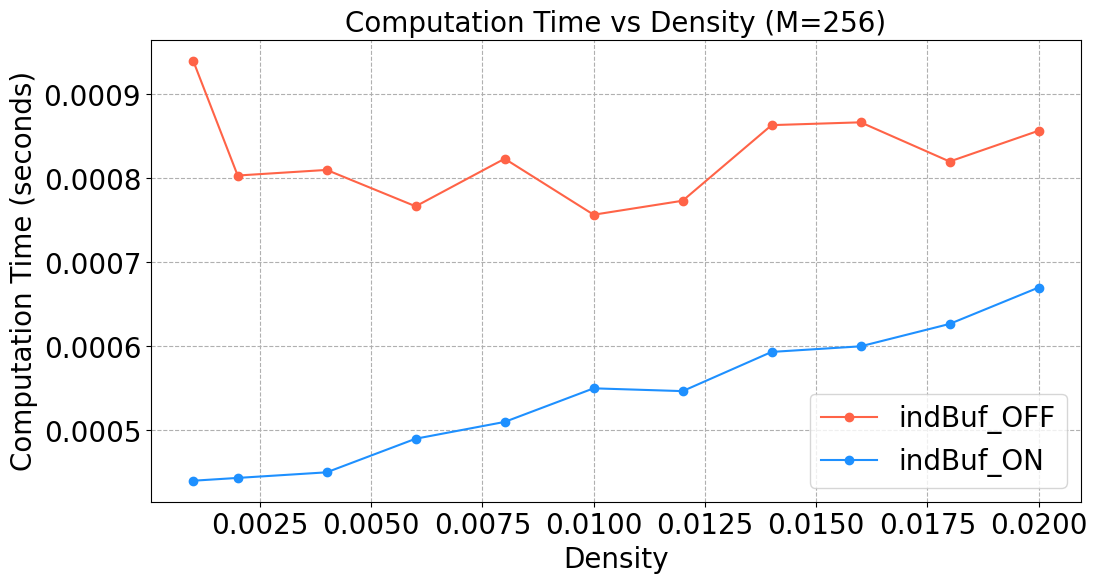

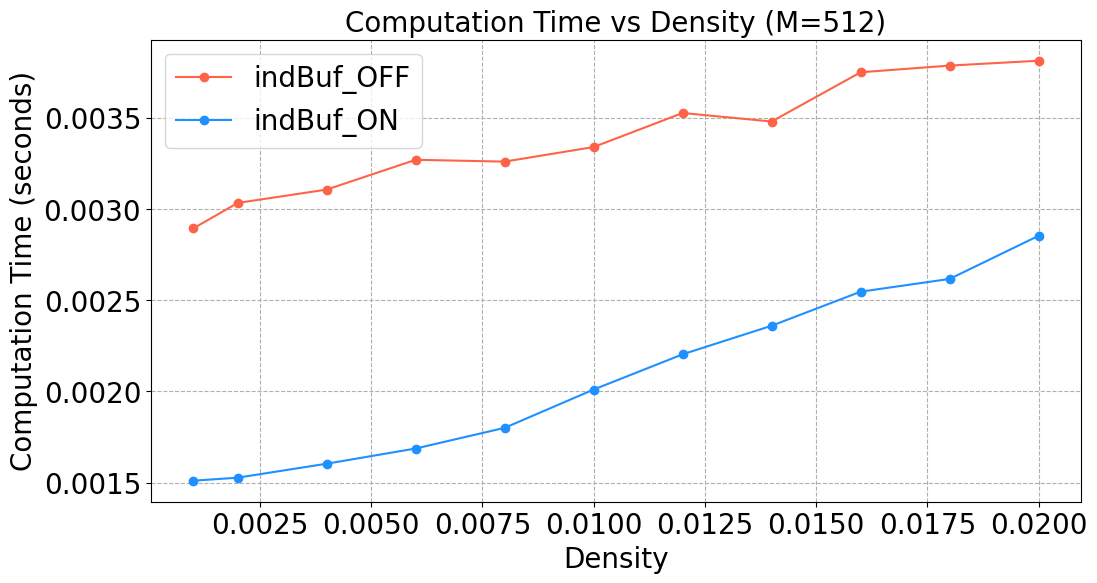

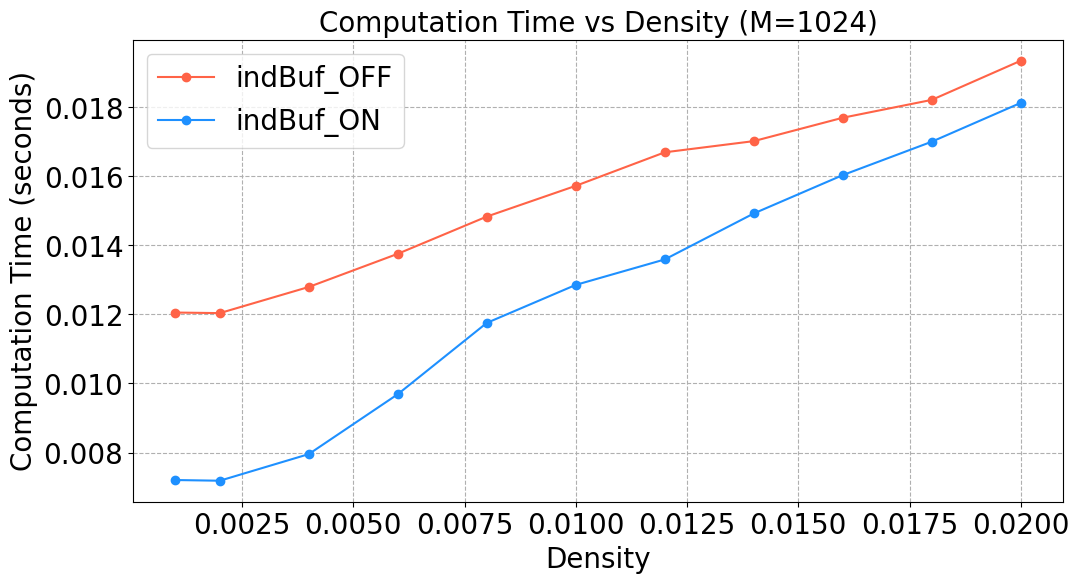

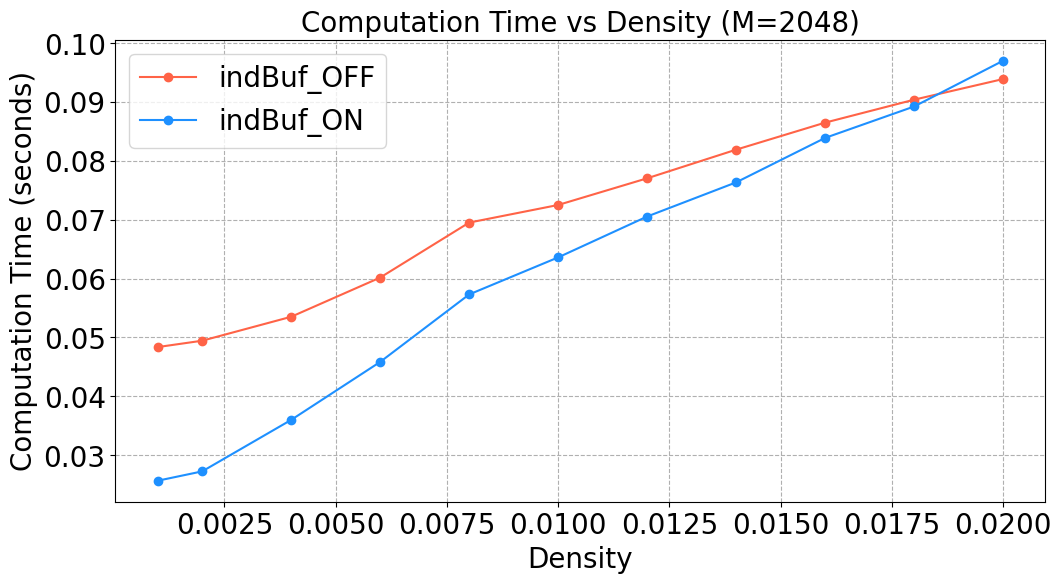

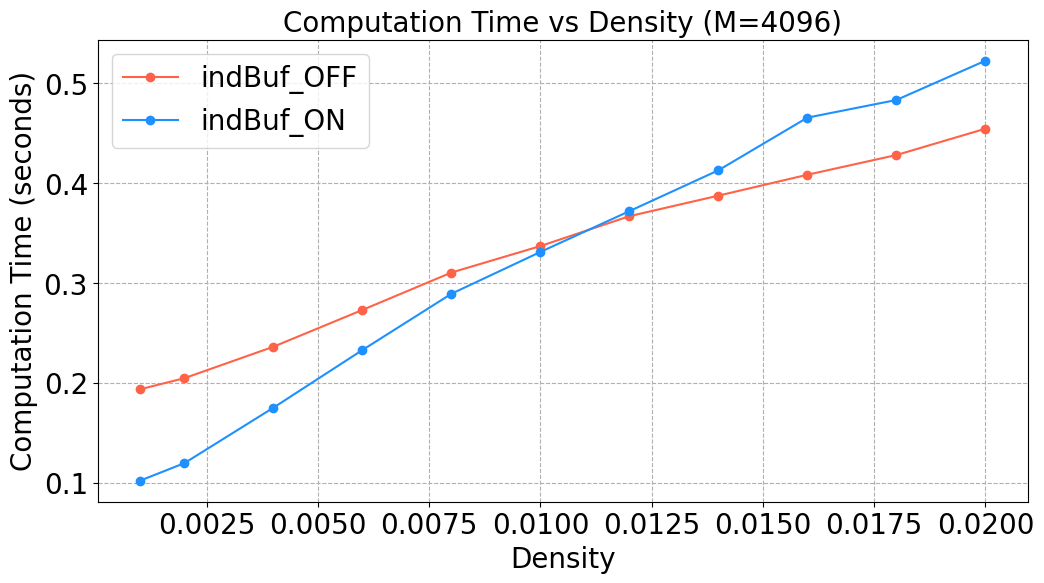

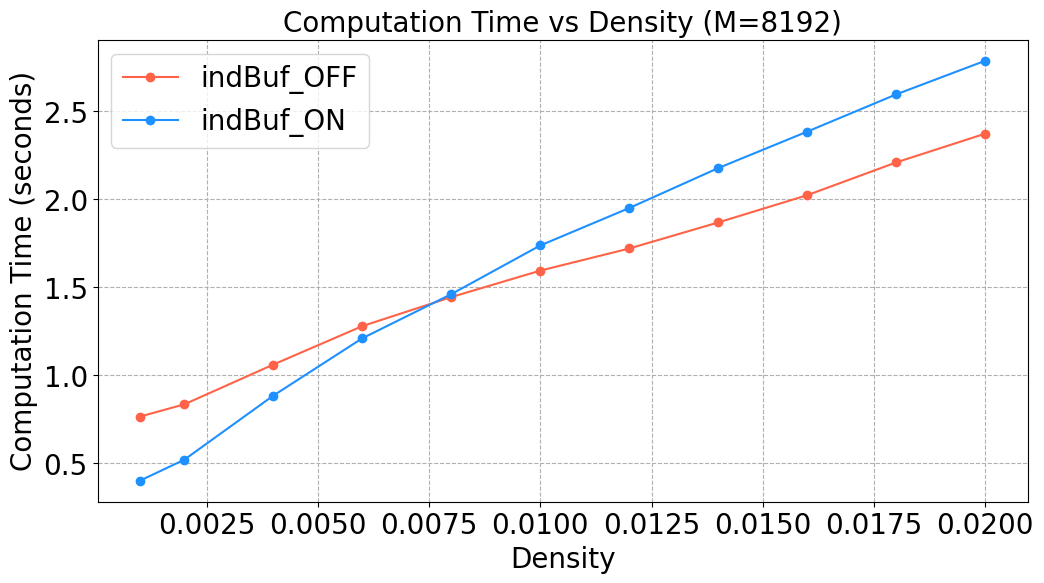

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = '/Users/edlin/Desktop/Courses/UoE_Sem2/Dissertation/exp_data/indbuf_0814.txt'  # Replace with your file path

# Read data from file
data = []
with open(file_path, 'r') as file:
    lines = file.readlines()
    current_size = None
    for line in lines:
        if 'Size' in line and 'Ratio' in line:
            # Parse the size and ratio
            parts = line.split(",")
            current_size = int(parts[0].split(":")[1].strip())
            current_ratio = float(parts[1].split(":")[1].strip())
        elif 'SpArr_SpGEMM(indBuf_OFF)' in line:
            # Parse indBuf_OFF time
            indBuf_OFF_time = float(line.split()[1].strip())
            data.append({'size': current_size, 'ratio': current_ratio, 'method': 'indBuf_OFF', 'time': indBuf_OFF_time})
        elif 'SpArr_SpGEMM(indBuf_ON)' in line:
            # Parse indBuf_ON time
            indBuf_ON_time = float(line.split()[1].strip())
            data.append({'size': current_size, 'ratio': current_ratio, 'method': 'indBuf_ON', 'time': indBuf_ON_time})

# Convert list to DataFrame
df = pd.DataFrame(data)

# Calculate the average time for each (size, ratio, method) combination
df_avg = df.groupby(['size', 'ratio', 'method']).agg({'time': 'mean'}).reset_index()

# Pivot the table to have `ratio` as the index and `time` as columns for each method
df_pivot = df_avg.pivot_table(index=['size', 'ratio'], columns='method', values='time').reset_index()

# Plot function
def plot_data(df, size):
    plt.figure(figsize=(12, 6))
    subset = df[df['size'] == size]
    
    plt.plot(subset['ratio'], subset['indBuf_OFF'], marker='o', linestyle='-', label='indBuf_OFF', color='#FF6347')
    plt.plot(subset['ratio'], subset['indBuf_ON'], marker='o', linestyle='-' , label='indBuf_ON', color='#1E90FF')
    
    plt.xlabel('Density', fontsize=20)
    plt.ylabel('Computation Time (seconds)', fontsize=20)
    plt.title(f'Computation Time vs Density (M={size})', fontsize=20)
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    
    plt.legend(fontsize=20)
    plt.grid(True, which="both", ls="--")
    plt.show()
    
for size in df_pivot['size'].unique():
    plot_data(df_pivot, size)

method  size  ratio  indBuf_OFF  indBuf_ON
0         32  0.001    0.000150   0.000027
1         32  0.002    0.000137   0.000020
2         32  0.004    0.000137   0.000027
3         32  0.006    0.000140   0.000030
4         32  0.008    0.000130   0.000067
..       ...    ...         ...        ...
94      8192  0.012    1.720757   1.950603
95      8192  0.014    1.868747   2.177600
96      8192  0.016    2.023633   2.384713
97      8192  0.018    2.209880   2.596277
98      8192  0.020    2.373123   2.787327

[99 rows x 4 columns]


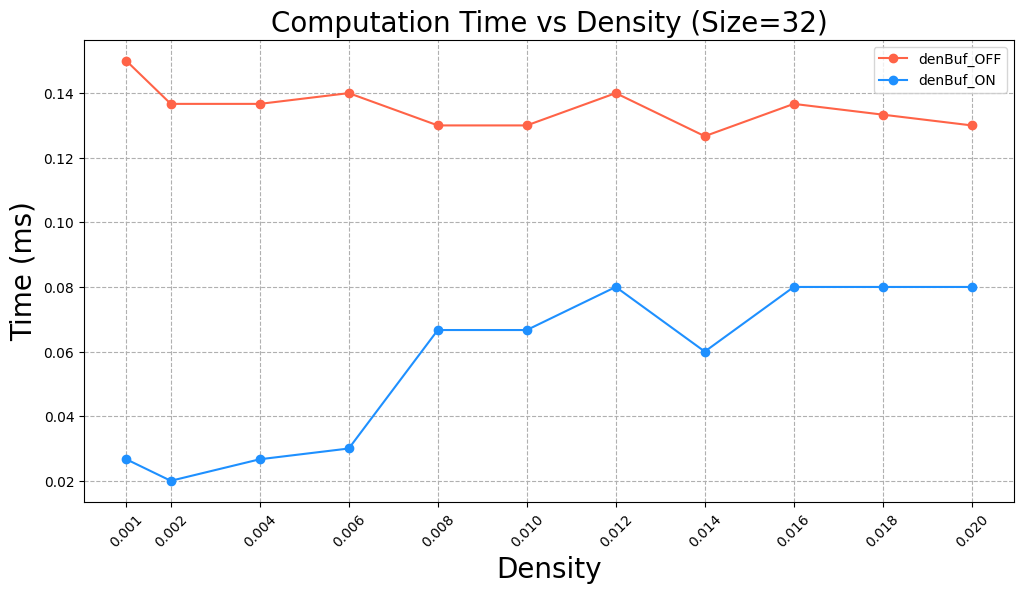

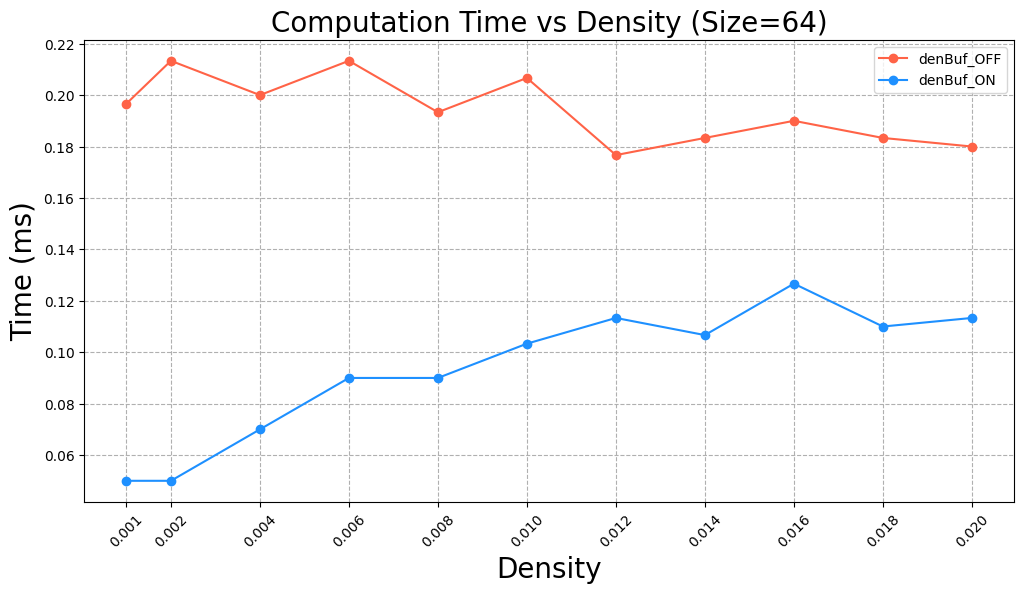

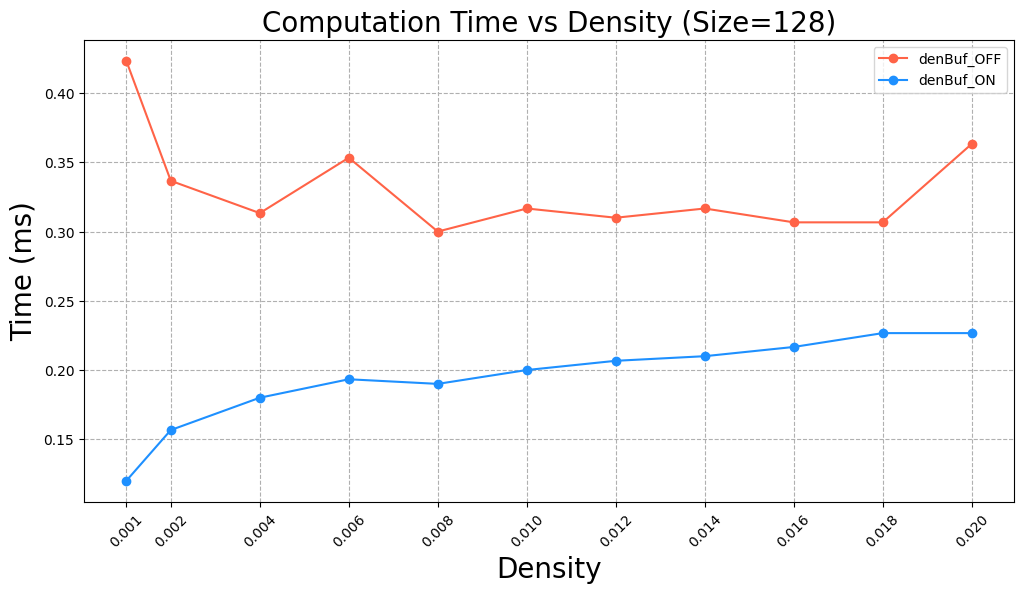

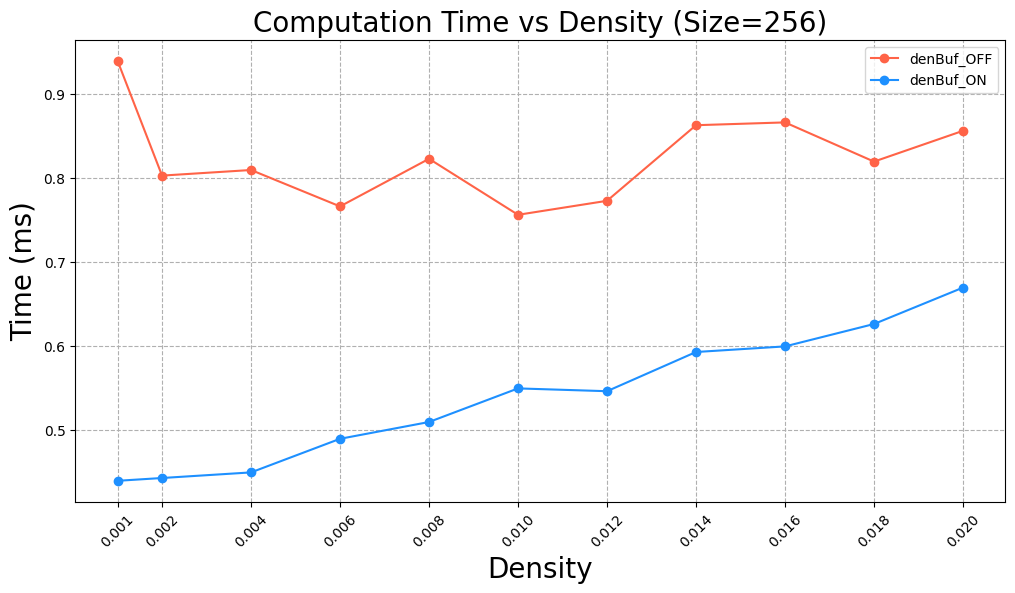

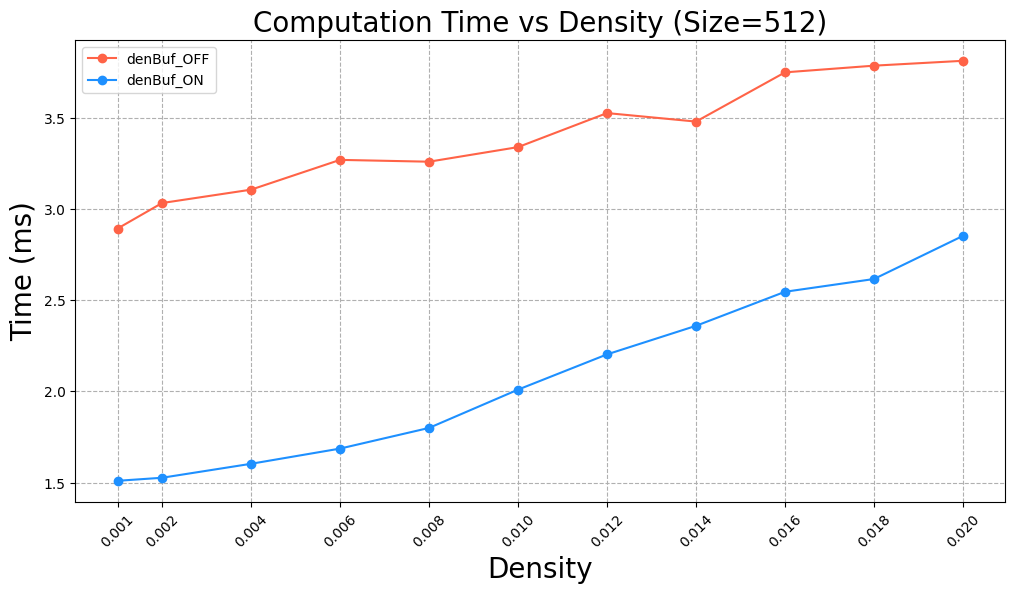

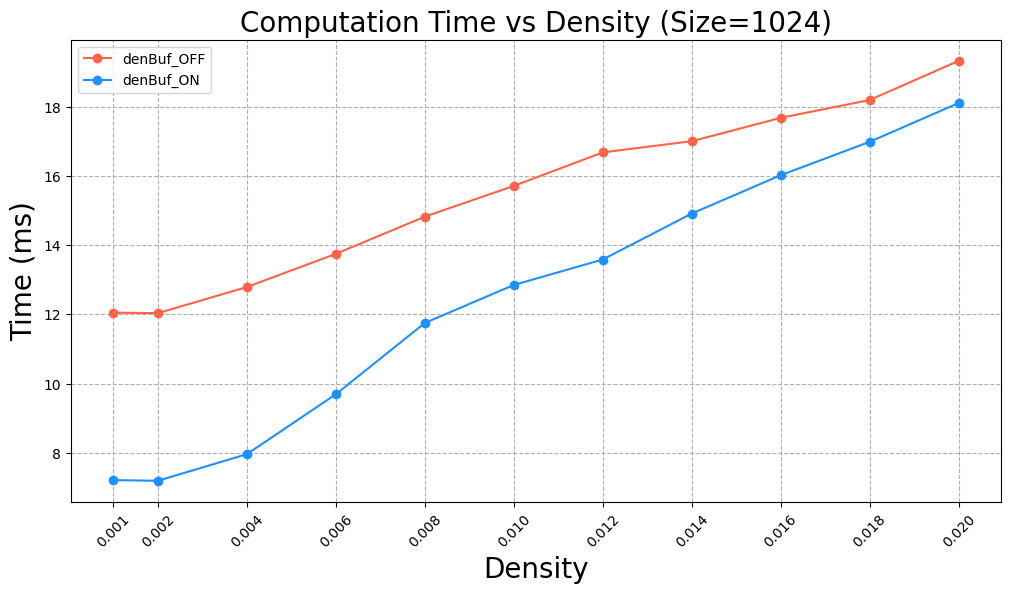

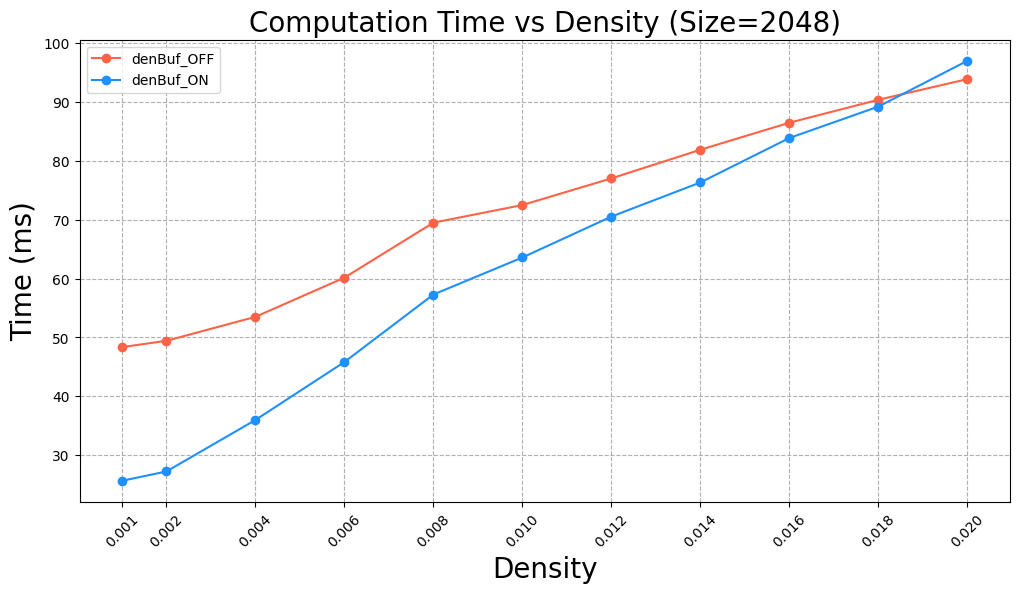

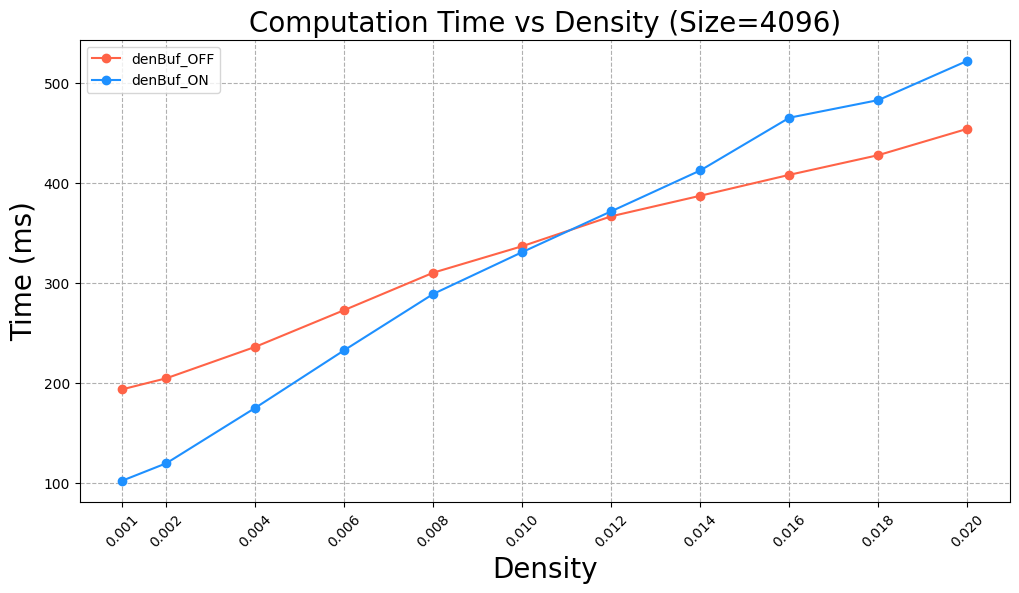

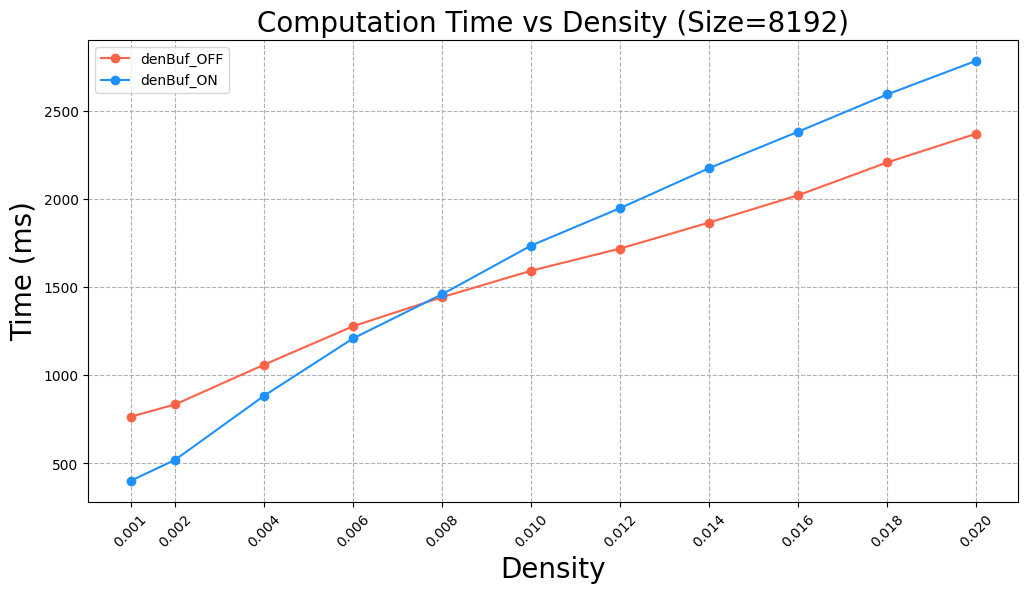

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = '/Users/edlin/Desktop/Courses/UoE_Sem2/Dissertation/exp_data/indbuf_0814.txt'  # Replace with your file path

# Read data from file
data = []
with open(file_path, 'r') as file:
    lines = file.readlines()
    current_size = None
    for line in lines:
        if 'Size' in line and 'Ratio' in line:
            # Parse the size and ratio
            parts = line.split(",")
            current_size = int(parts[0].split(":")[1].strip())
            current_ratio = float(parts[1].split(":")[1].strip())
        elif 'SpArr_SpGEMM(indBuf_OFF)' in line:
            # Parse indBuf_OFF time
            indBuf_OFF_time = float(line.split()[1].strip())
            data.append({'size': current_size, 'ratio': current_ratio, 'method': 'indBuf_OFF', 'time': indBuf_OFF_time})
        elif 'SpArr_SpGEMM(indBuf_ON)' in line:
            # Parse indBuf_ON time
            indBuf_ON_time = float(line.split()[1].strip())
            data.append({'size': current_size, 'ratio': current_ratio, 'method': 'indBuf_ON', 'time': indBuf_ON_time})

# Convert list to DataFrame
df = pd.DataFrame(data)

# Calculate the average time for each (size, ratio, method) combination
df_avg = df.groupby(['size', 'ratio', 'method']).agg({'time': 'mean'}).reset_index()

# Pivot the table to have `ratio` as the index and `time` as columns for each method
df_pivot = df_avg.pivot_table(index=['size', 'ratio'], columns='method', values='time').reset_index()

# Plot function
def plot_data(df, size):
    plt.figure(figsize=(12, 6))
    subset = df[df['size'] == size]
    
    plt.plot(subset['ratio'], subset['indBuf_OFF'] * 1000, marker='o', linestyle='-', label='denBuf_OFF', color='#FF6347')
    plt.plot(subset['ratio'], subset['indBuf_ON'] * 1000, marker='o', linestyle='-' , label='denBuf_ON', color='#1E90FF')
    
    plt.xlabel('Density', fontsize=20)
    plt.ylabel('Time (ms)', fontsize=20)
    plt.title(f'Computation Time vs Density (Size={size})', fontsize=20)
    # Ensure xticks are exactly at ratio values
    plt.xticks(subset['ratio'], rotation=45)
    
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
    
print(df_pivot)
for size in df_pivot['size'].unique():
    plot_data(df_pivot, size)
